In [1]:
import sys
import numpy as np
import xarray as xr
import awkward as ak
import matplotlib.pyplot as plt
import random
import matplotlib

# sys.path.append('/home/m/m300950/CLEO/')
from pySD.sdmout_src import *
from pySD.sdmout_src import sdtracing

In [2]:
path2CLEO = "/home/m/m301096/CLEO/"
datapath = path2CLEO+'data/output/raw/stationary/clusters_18/'
# datapath = path2CLEO+'data/output/raw/no_aerosols_no_collision_many_1024/clusters_301/'
dataset = datapath+"eurec4a1d_sol.zarr"
setuptxt = datapath+"eurec4a1d_setup.txt"
statsfile = datapath+"eurec4a1d_stats.txt"
gridfile = datapath+"share/eurec4a1d_ddimlessGBxboundaries.dat"
print(datapath)

/home/m/m301096/CLEO/data/output/raw/stationary/clusters_18/


In [3]:
ds = pyzarr.get_rawdataset(dataset)
ds

<xarray.Dataset> Size: 136B
Dimensions:             (superdroplets: 0, gbxindex: 34, time: 0)
Coordinates:
  * gbxindex            (gbxindex) uint32 136B 4148292768 32767 ... 144 0
  * time                (time) float64 0B 
Dimensions without coordinates: superdroplets
Data variables: (12/19)
    coord3              (superdroplets) float64 0B ...
    massmom0            (time, gbxindex) uint64 0B ...
    massmom0_raindrops  (time, gbxindex) uint64 0B ...
    massmom1            (time, gbxindex) float64 0B ...
    massmom1_raindrops  (time, gbxindex) float64 0B ...
    massmom2            (time, gbxindex) float64 0B ...
    ...                  ...
    raggedcount         (time) uint32 0B ...
    sdId                (superdroplets) uint32 0B ...
    sdgbxindex          (superdroplets) uint32 0B ...
    temp                (time, gbxindex) float64 0B ...
    wvel                (time, gbxindex) float64 0B ...
    xi                  (superdroplets) uint64 0B ...
Attributes:
    creator:  Clara Bayley
    title:    Dataset from CLEO is Xarray and NetCDF compatible Zarr Group of...

In [4]:
config = pysetuptxt.get_config(setuptxt, nattrs=3, isprint=True)
consts = pysetuptxt.get_consts(setuptxt, isprint=True)
gbxs = pygbxsdat.get_gridboxes(gridfile, consts["COORD0"], isprint=True)


---- config from  /home/m/m301096/CLEO/data/output/raw/stationary/clusters_18/eurec4a1d_setup.txt -----
nspacedims = 1
ngbxs = 34.0
maxnsupers = 32768.0
CONDTSTEP = 0.1
COLLTSTEP = 1.0
MOTIONTSTEP = 2.0
COUPLTSTEP = 1200.0
OBSTSTEP = 10.0
T_END = 1200.0
initnsupers = 256.0
maxchunk = 2500000.0
niters = 2.0
SUBTSTEP = 0.1
rtol = 0.0
atol = 0.01
COORD3LIM = 656.0
newnsupers = 256.0
MINRADIUS = 1e-07
MAXRADIUS = 0.001
NUMCONC_a = 575.2796379127539
GEOMEAN_a = 0.0001304169785725949
geosigma_a = 1.6746895810382312
NUMCONC_b = 64231.0182568868
GEOMEAN_b = 2.0697867776705365e-06
geosigma_b = 1.6999999990440153
numSDattrs = 4
ntime = 121
---------------------------------------------


---- consts from  /home/m/m301096/CLEO/data/output/raw/stationary/clusters_18/eurec4a1d_setup.txt -----
G = 9.80665
RGAS_UNIV = 8.314462618
MR_WATER = 0.01801528
MR_DRY = 0.028966216
LATENT_V = 2500930.0
CP_DRY = 1004.64
CP_V = 1865.01
C_L = 4192.664
RHO_DRY = 1.177
RHO_L = 998.203
RHO_SOL = 2016.5
MR_SOL = 0.05

In [5]:
time = pyzarr.get_time(ds)
thermodata = pyzarr.get_thermodata(ds, config["ntime"], gbxs["ndims"], consts)
sddata = pyzarr.get_supers(ds, consts)
gbxindex = pyzarr.get_gbxindex(ds, gbxs["ndims"])
totnsupers = pyzarr.get_totnsupers(ds)
nsupers = pyzarr.get_nsupers(ds, config["ntime"], gbxs["ndims"])
sdrain = pyzarr.get_rainsupers(ds, consts)
massmoms = pyzarr.get_massmoms(ds, config["ntime"], gbxs["ndims"])
rainmassmoms = pyzarr.get_rainmassmoms(dataset, config["ntime"], gbxs["ndims"]) 

ValueError: cannot reshape array of size 0 into shape (121,1,1,34)

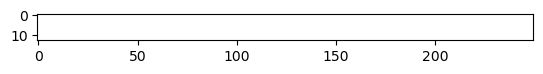

In [ ]:
plt.imshow(diam)

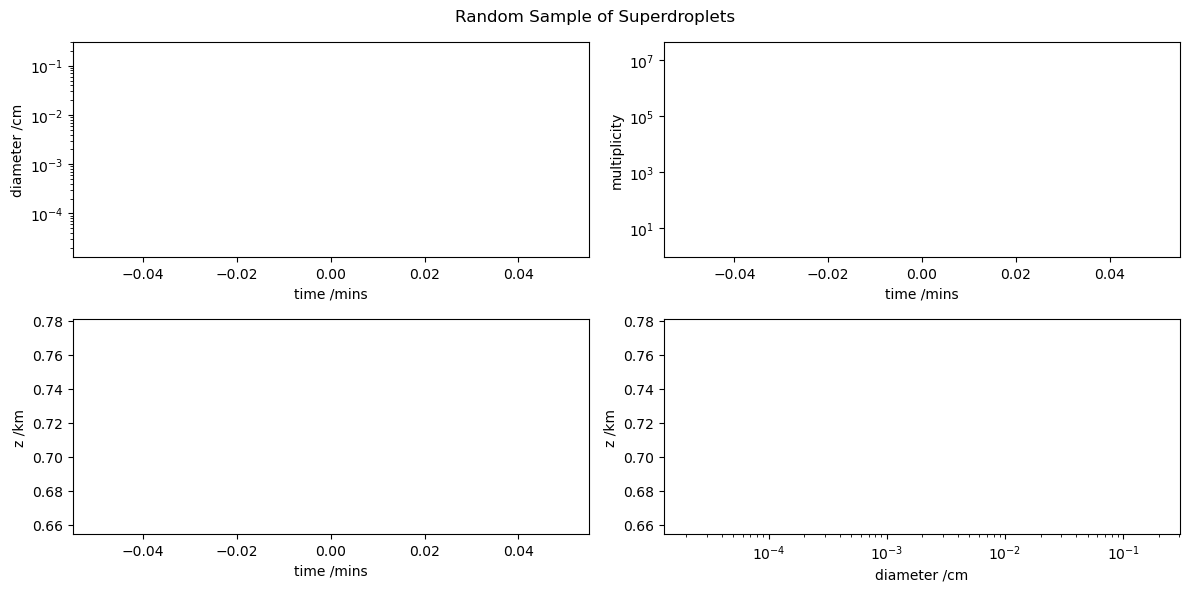

In [ ]:
nsample = 250

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,6))    
axs = axs.flatten()
fig.suptitle("Random Sample of Superdroplets")

minid, maxid = 0, int(totnsupers[0]) # largest value of ids to sample
ids2plot = random.sample(list(range(minid, maxid, 1)), nsample)
  
attrs = ["radius", "coord3", "xi"]
data = sdtracing.attrs_for_superdroplets_sample(sddata, attrs, ids=ids2plot) 
  
diam = data["radius"] * 2 / 1e4 # [cm]
axs[0].plot(time.mins, diam, linewidth=0.8)
axs[0].set_xlabel("time /mins")
axs[0].set_ylabel("diameter /cm")
axs[0].set_yscale("log")

axs[1].plot(time.mins, data["xi"], linewidth=0.8)
axs[1].set_xlabel("time /mins")
axs[1].set_ylabel("multiplicity")
axs[1].set_yscale("log")

crd3 = data["coord3"] / 1000 # [km]
axs[2].plot(time.mins, crd3, linewidth=0.8)
axs[2].set_xlabel("time /mins")
axs[2].set_ylabel("z /km")

axs[3].plot(diam, crd3, linewidth=0.8)
axs[3].set_xlabel("diameter /cm")
axs[3].set_xscale("log")
axs[3].set_ylabel("z /km")

fig.tight_layout()

In [ ]:
def initial_radius_colour(sdId, radius, id):
  ''' loop over sdIds until id is first found. When found, return radius of droplet'''

  is_found, idx = False, 0
  while is_found == False:
    r0 = np.where(sdId[idx] == id, radius[idx], np.nan)
    r0 = r0[~np.isnan(r0)]
    if len(r0[~np.isnan(r0)]) == 1:
      is_found = True
      c = r0[0]
    else:
      idx += 1
  
  return c

def plot_against_coord3_forgbx(axs, t2plts, gbx2plt, gbxzlims, get_var, xlims, xlog):
  
  radius0 = sddata.radius[0]
  vmin, vmax = [np.amin(radius0), np.amax(radius0)]
  norm = matplotlib.colors.LogNorm(vmin=vmin, vmax=vmax)

  for ax, t in zip(axs, t2plts):
    idx = np.argmin(abs(time.secs - t))
    bools = np.where(sddata.sdgbxindex[idx] == gbx2plt, True, False)
    
    sdId = sddata.sdId[idx][bools]
    colours = []
    for id in sdId:
      colours.append(initial_radius_colour(sddata.sdId, sddata.radius, id))

    coord3 = sddata.coord3[idx][bools]
    var = get_var(sddata, idx, bools)
    ax.scatter(var, coord3, c=colours, cmap="plasma", norm=norm)
    ax.set_title("t={:.0f}s".format(time.secs[idx]))

    ax.set_ylim(gbxzlims)
    ax.set_yticks(np.arange(gbxzlims[0], gbxzlims[1], 10))
    ax.set_xlim(xlims)
    if xlog: ax.set_xscale("log")
  axs[0].set_ylabel("z /m") 

def scatter_against_coord3(t2plts, get_var, xlabel, xlims, xlog):
  
    height_ratios = [gbxs["zhalf"][-1] - gbxs["zhalf"][-2], gbxs["zhalf"][-2] - gbxs["zhalf"][-3]]
    fig, axs = plt.subplots(nrows=2, ncols=len(t2plts), figsize=(12,10), sharex=True,
                            gridspec_kw={'height_ratios': height_ratios, 'hspace': 0})

    gbx2plt = ds.gbxindex.max().values # highest gbx
    gbxzlims = [gbxs["zhalf"][-2], gbxs["zhalf"][-1]]
    plot_against_coord3_forgbx(axs[0,:], t2plts, gbx2plt, gbxzlims, get_var, xlims, xlog)

    gbx2plt = ds.gbxindex.values[ds.gbxindex.values != ds.gbxindex.max().values].max() # second highest gbx
    gbxzlims = [gbxs["zhalf"][-3], gbxs["zhalf"][-2]]
    plot_against_coord3_forgbx(axs[1,:], t2plts, gbx2plt, gbxzlims, get_var, xlims, xlog)

    for ax in axs[1]:
        ax.set_xlabel(xlabel)
        ax.set_title("")

    fig.suptitle("Super-Droplets Coloured by their Initial Radius in the Top Two Gridboxes")
    fig.tight_layout()

    return fig, axs

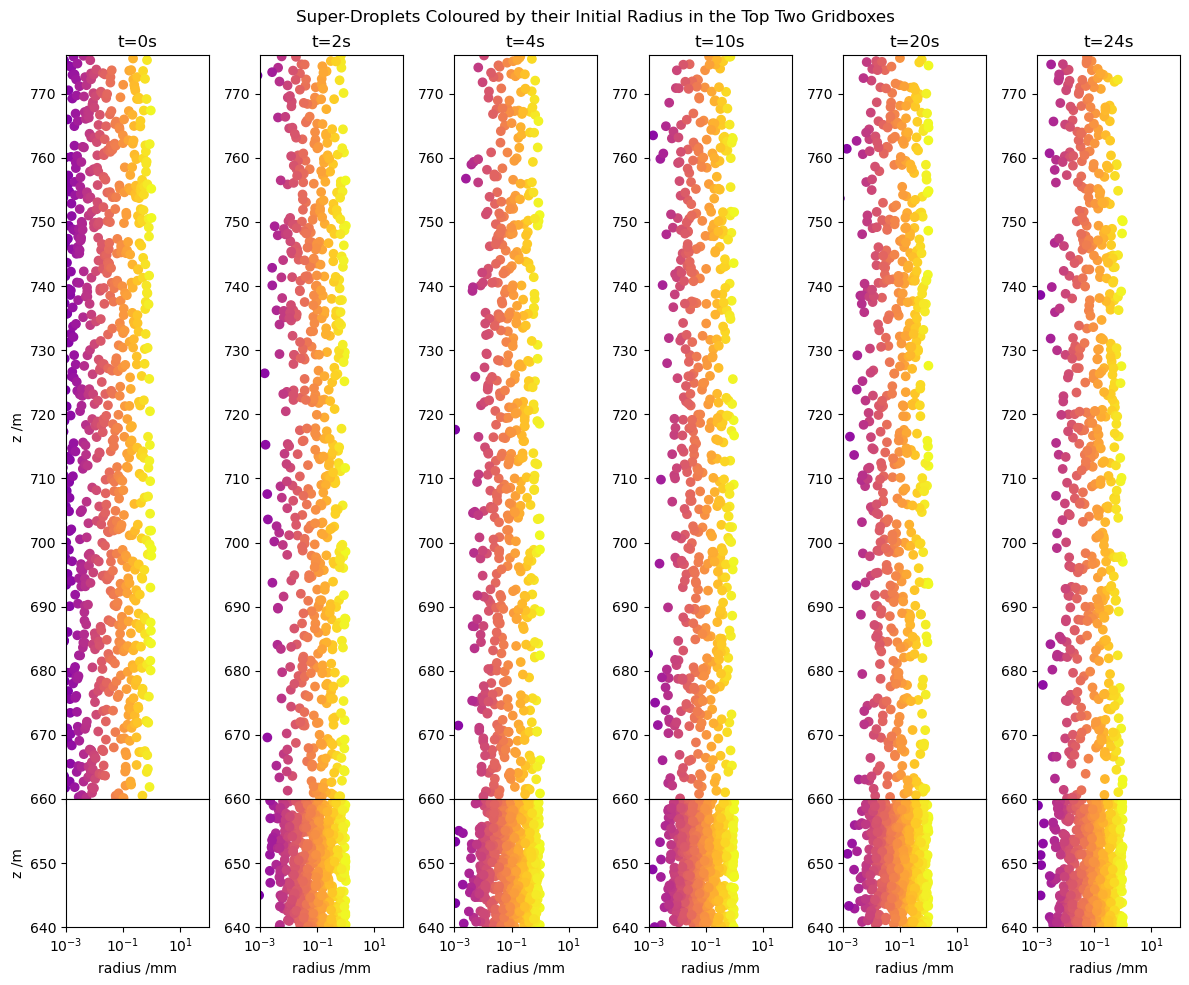

In [ ]:
t2plts = [0, 2, 4, 10, 20, 60]

def radius_attime_forgbx(sddata, idx, bools):
    return sddata.radius[idx][bools] * 1e-3 # [mm]
fig, axs = scatter_against_coord3(t2plts, radius_attime_forgbx, "radius /mm", [1e-3, 100], True)

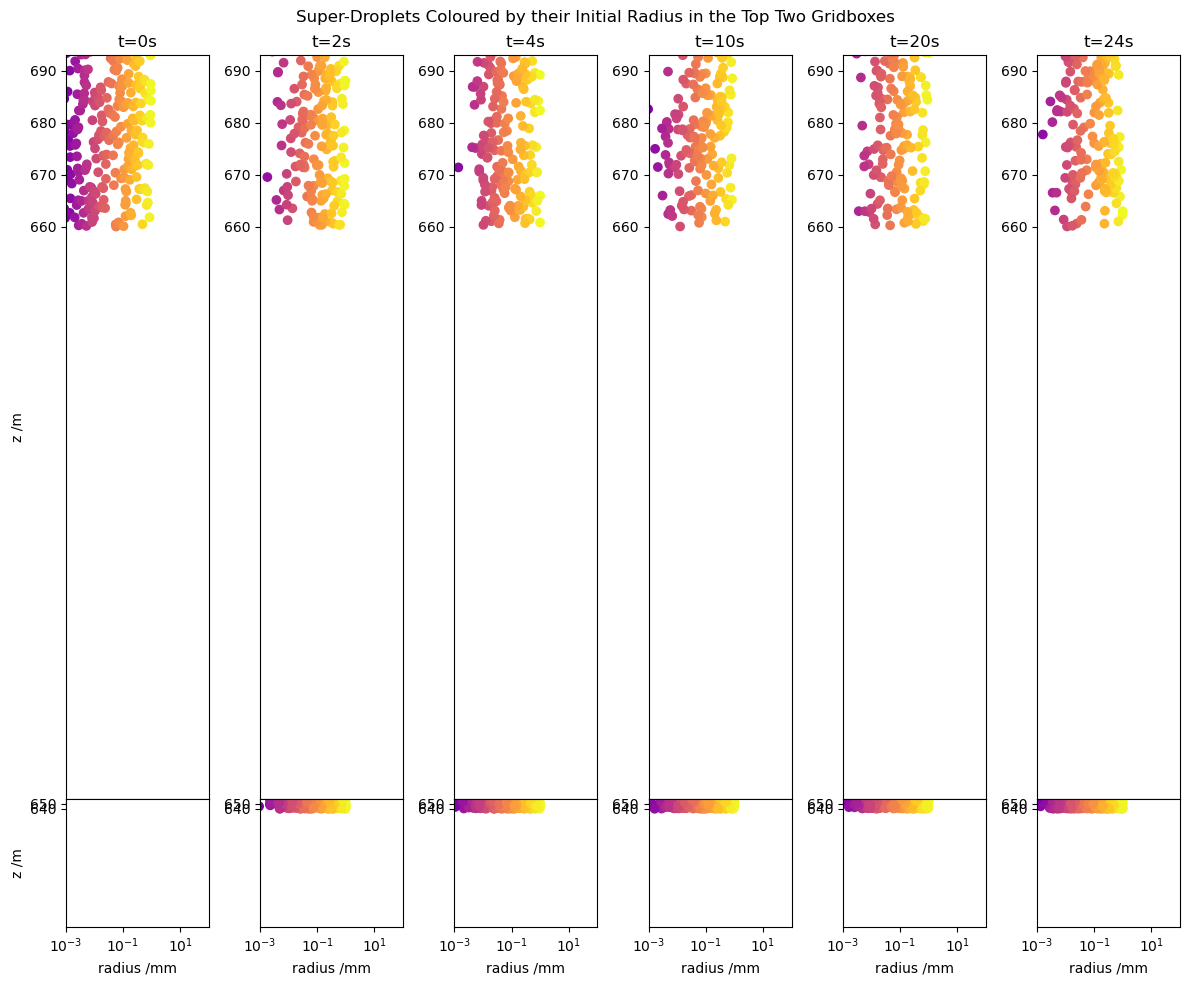

In [ ]:
for ax in axs[0].flatten():
    ax.set_ylim(550, None)
# for ax in axs[1].flatten():
#     ax.set_ylim(N, 660)

fig

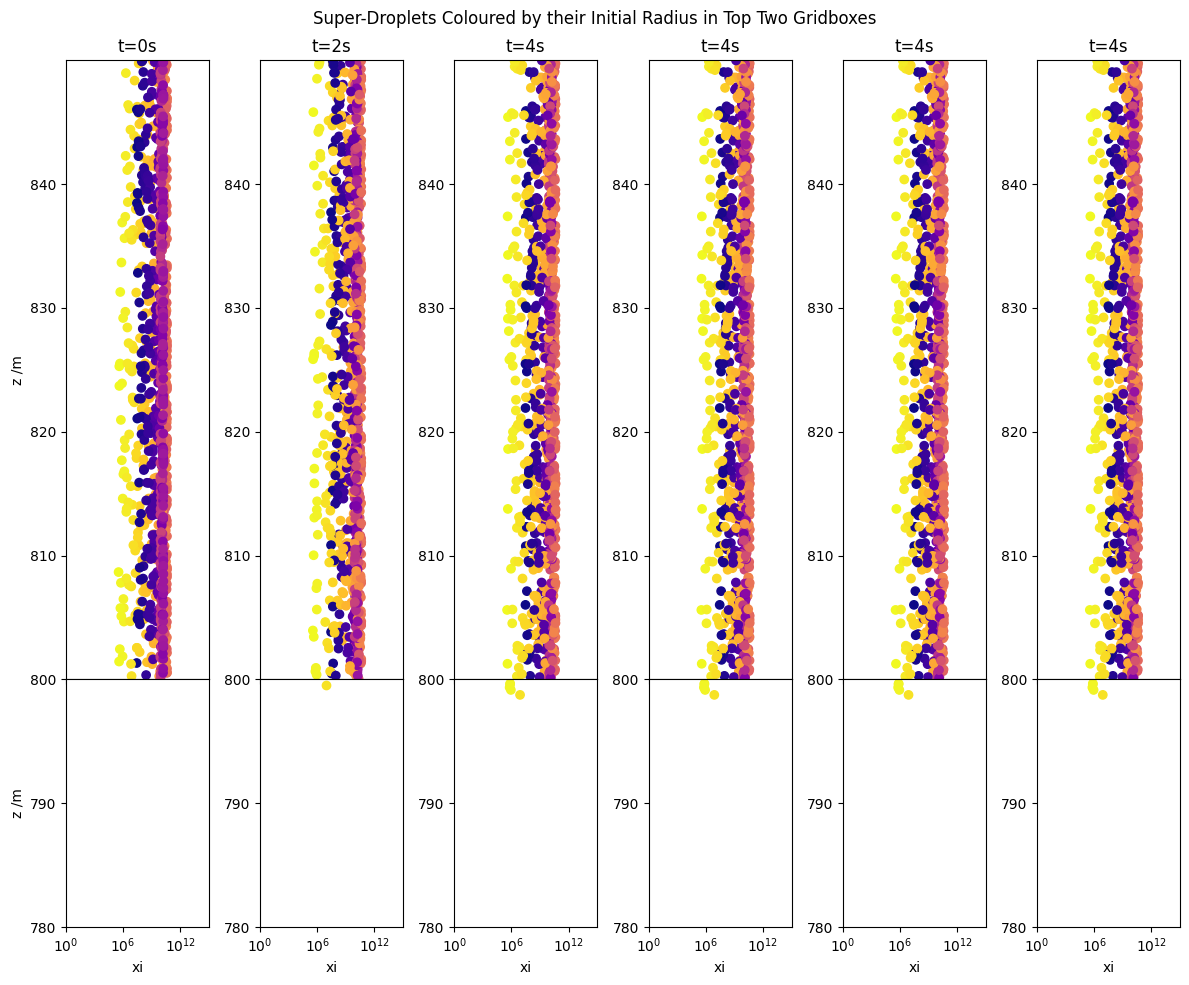

In [ ]:
def xi_attime_forgbx(sddata, idx, bools):
    return sddata.xi[idx][bools]
fig, axs = scatter_against_coord3(t2plts, xi_attime_forgbx, "xi", [1, 1e15], True)


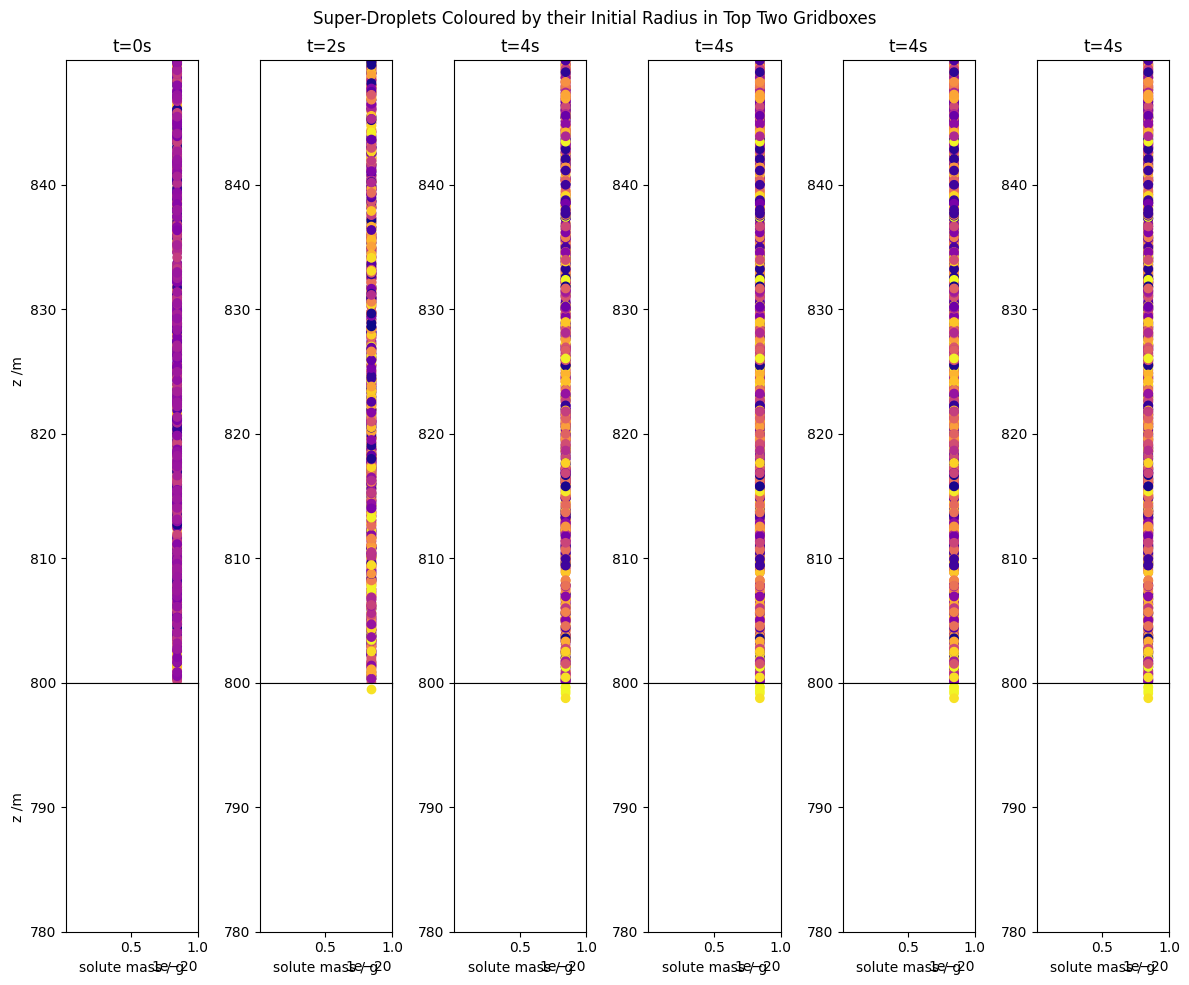

In [ ]:
def msol_attime_forgbx(sddata, idx, bools):
    return sddata.msol[idx][bools]
fig, axs = scatter_against_coord3(t2plts, msol_attime_forgbx, "solute mass / g", [1e-22, 1e-20], False)


In [ ]:
# def sdId_attime_forgbx(sddata, idx, bools):
#     return sddata.sdId[idx][bools]
# fig, axs = scatter_against_coord3(t2plts, sdId_attime_forgbx, "sdId", [2000, 2300], False)

# def coord3_attime_forgbx(sddata, idx, bools):
#     return sddata.coord3[idx][bools]
# fig, axs = scatter_against_coord3(t2plts, coord3_attime_forgbx, "coord3 /m", [750, 900], False)

# def coord1_attime_forgbx(sddata, idx, bools):
#     return sddata.coord1[idx][bools]
# fig, axs = scatter_against_coord3(t2plts, coord1_attime_forgbx, "coord1 /m", [-20, 20], False)

# def coord2_attime_forgbx(sddata, idx, bools):
#     return sddata.coord2[idx][bools]
# fig, axs = scatter_against_coord3(t2plts, coord2_attime_forgbx, "coord2 /m", [-20, 20], False)

In [ ]:
def plot_distrib_forcoord3range(axs, t2plts, zlims, get_wghts, rlims, nbins, ylog, xarea):
  
    # create nbins evenly spaced in log10(r)
    hedgs = np.linspace(np.log10(rlims[0]), np.log10(rlims[1]), nbins+1)
    hcens = (10**hedgs[1:]+10**hedgs[:-1])/2 / 1000 # mm

    # volume of region droplets are within
    vol = xarea * (zlims[1] - zlims[0])

    for ax, t in zip(axs, t2plts):
        idx = np.argmin(abs(time.secs - t))
        bools = np.where(sddata.coord3[idx] >= zlims[0], True, False)
        bools = np.where(sddata.coord3[idx] < zlims[1], bools, False)
                
        radius = sddata.radius[idx][bools]
        wghts = get_wghts(sddata, idx, bools, vol)
        
        hist, hedgs = np.histogram(np.log10(radius), bins=hedgs,
                                    weights=wghts, density=None)
        print("Sum over histogram:", np.sum(hist))

        ax.plot(hcens, hist, color="blue", linewidth=0.8)
        ax.set_title("t={:.0f}s".format(time.secs[idx]))

        ax.set_xlim([hcens[0], hcens[-1]])
        ax.set_xscale("log")
        
        if ylog: ax.set_yscale("log")

def distrib_against_radius(t2plts, get_wghts, rlims, nbins, ylabel, ylog, xarea):
  
    fig, axs = plt.subplots(nrows=2, ncols=len(t2plts), figsize=(16,5), sharex=True, sharey=True,
                            gridspec_kw={'hspace': 0})

    zlims = [gbxs["zhalf"][-2], gbxs["zhalf"][-1]]
    plot_distrib_forcoord3range(axs[0,:], t2plts, zlims, get_wghts, rlims, nbins, ylog, xarea)

    zlims = [gbxs["zhalf"][-3], gbxs["zhalf"][-2]]
    plot_distrib_forcoord3range(axs[1,:], t2plts, zlims, get_wghts, rlims, nbins, ylog, xarea)

    for ax in axs[:,0]:
        ax.set_ylabel(ylabel)

    for ax in axs[1]:
        ax.set_xlabel("radius /mm")
        ax.set_title("")

    fig.suptitle("Droplet Size Distribution in the Top Two Gridboxes")
    fig.tight_layout()

    return fig, axs

In [ ]:
t2plts = [0, 2, 4, 10, 20, 60]
# rlims = [np.min(sddata.radius[0])/10, np.max(sddata.radius[0])*10]
rlims = [1e-1, 1e6] # microns
nbins = 128
xarea = (gbxs["xhalf"][-1] - gbxs["xhalf"][-2]) * (gbxs["yhalf"][-1] - gbxs["yhalf"][-2])

def numconc_attime_forgbx(sddata, idx, bools, vol):
    return sddata.xi[idx][bools] / vol / 1e6  # [cm^-3]
ylabel = "number concentration"
fig, axs = distrib_against_radius(t2plts, numconc_attime_forgbx, rlims, nbins, ylabel, False, xarea)


NameError: name 'distrib_against_radius' is not defined